# AdeptID Take Home

## Exporatory Data Analysis


In [103]:
import pandas as pd

data = pd.read_csv('./data/data.csv', ',')

print("Shape: ", data.shape)


/var/folders/k0/1kf2c4rj2rx7n2dx3k7zxchm0000gn/T/ipykernel_63521/1525212031.py:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data = pd.read_csv('./data/data.csv', ',')


Shape:  (50000, 60)


In [3]:
print(data.head())

                        candidate_id application_status  \
0  bgjikcrozdgkrtzigymnaylpypxxublc0          interview   
1  pgvjmzqyjgzmbgqetvzteeejufcexbur1          interview   
2  snzyhcbqkbtiydfxcxhpcyzuirxzpxcx2          interview   
3  tbugkzlvhnkjkgzclndonrcusetoygmc3              hired   
4  fxhprrcbbbqkuidxmjcahezgljgnxbte4              hired   

   number_of_employees_log                      occupation_id  \
0                      2.0  exvwhbxlejsfyqxnwjabksnntpwodfhr0   
1                      1.0  jpegpbxvbsjbkwmahpbvcdbxzcdjmack1   
2                      1.0  czwkhxbmdopwdiuufvsxtahuqnifojgl2   
3                      4.0  aeuvpjqtkaeeqghymzriuvoyqfzikhwq3   
4                      4.0  iyejtuewotamjissxrmlncpoteqyqvdk4   

                          company_id  occupation_skill_1_count  \
0  xuemjhkyskdkwxlfbykrvkrffvpoepid0                       1.0   
1  ndahnrikmemhkgwgsrfoaazzkszfntja1                       0.0   
2  xzlecjjnxynakiohuqudeusnnrzlrivp2                    

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 60 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   candidate_id                       50000 non-null  object 
 1   application_status                 50000 non-null  object 
 2   number_of_employees_log            50000 non-null  float64
 3   occupation_id                      50000 non-null  object 
 4   company_id                         50000 non-null  object 
 5   occupation_skill_1_count           33374 non-null  float64
 6   occupation_skill_2_count           37227 non-null  float64
 7   occupation_skill_3_count           34724 non-null  float64
 8   occupation_skill_4_count           36279 non-null  float64
 9   occupation_skill_5_count           34998 non-null  float64
 10  occupation_skill_6_count           30468 non-null  float64
 11  occupation_skill_7_count           32920 non-null  flo

### Shuffle Data

I shuffled the data to ensure a randomized order to prevent overfitting during model training.


In [104]:
from sklearn.utils import shuffle

data = shuffle(data)

print(data.head())

                                candidate_id application_status  \
33300  cdrcovuorqgutvcojxxdxsylpoiwqtak33300          interview   
13003  hjgznpkxrsmredjvhxakaqsurakqzgcr13003              hired   
20539  roxlmmkavcolhjvbwwfntbivygmgyxum20539      pre-interview   
15648  tkbjajnxuwocddorqtgkrdzjubaophhw15648              hired   
20830  iqjvqexbsqwobiroanldzksnhegifxej20830              hired   

       number_of_employees_log                          occupation_id  \
33300                      2.9  oqtfzrrelzonyzpunhzosoenmjckmvon33300   
13003                      4.0  jsghknprqrdrwnhjiimkxjvrwgikeypz13003   
20539                      1.0  fvsojbxmsxircljtfovijhtylgqgfppd20539   
15648                      4.0  ejaoxbbyctcbilwtujguauhgimavxnvr15648   
20830                      2.0  tfgblkttvoefskptakauoepaqubiyaur20830   

                                  company_id  occupation_skill_1_count  \
33300  qlnhnmlwsiruhdmlfooeippaxcrvbhkw33300                       0.0   
13003  tfh

## Handling Missing Data
First, I check how many missing values there are in each column.

Then, I impute missing continuous data and remove the rows containing missing categorical data. 

In [6]:
print(data.isnull().sum())

candidate_id                             0
application_status                       0
number_of_employees_log                  0
occupation_id                            0
company_id                               0
occupation_skill_1_count             16626
occupation_skill_2_count             12773
occupation_skill_3_count             15276
occupation_skill_4_count             13721
occupation_skill_5_count             15002
occupation_skill_6_count             19532
occupation_skill_7_count             17080
occupation_skill_8_count             14282
occupation_skill_9_count             15501
candidate_attribute_1                11063
candidate_attribute_2                 2247
application_attribute_1                  0
candidate_demographic_variable_1      9581
candidate_demographic_variable_2     15380
candidate_demographic_variable_3     14383
candidate_demographic_variable_4     10439
ethnicity                             2457
gender                                   0
candidate_d

### Impute Values for Missing Continuous Data

I impute continuous data using the columns' medians to account for any outliers.

In [105]:
from sklearn.impute import SimpleImputer
import numpy as np

cols_NaN = []
for column in data.columns:
    if(data[column].isna().sum()>0):
        cols_NaN.append(column)

cols_NaN.remove('ethnicity')
cols_NaN.remove('candidate_demographic_variable_5')

imputer = SimpleImputer(missing_values=np.NaN, strategy='median')

imputer=imputer.fit(data[cols_NaN])

data[cols_NaN]=imputer.transform(data[cols_NaN])

print(data.isnull().sum())



candidate_id                            0
application_status                      0
number_of_employees_log                 0
occupation_id                           0
company_id                              0
occupation_skill_1_count                0
occupation_skill_2_count                0
occupation_skill_3_count                0
occupation_skill_4_count                0
occupation_skill_5_count                0
occupation_skill_6_count                0
occupation_skill_7_count                0
occupation_skill_8_count                0
occupation_skill_9_count                0
candidate_attribute_1                   0
candidate_attribute_2                   0
application_attribute_1                 0
candidate_demographic_variable_1        0
candidate_demographic_variable_2        0
candidate_demographic_variable_3        0
candidate_demographic_variable_4        0
ethnicity                            2457
gender                                  0
candidate_demographic_variable_5  

### Drop Rows for Missing Categorical Data

Now, only the categorical rows are missing data. The simplest (and in this case best) solution is to remove any rows containing missing categorical data. 

Now that we have imputed all the data we can, we will remove the rows that contain NaN values for one or more categorical variables

In [106]:
data = data.dropna(axis = 0)
print(data.isna().sum().sum())
print(data.shape)


0
(42502, 60)


## Random Forest Ensemble

The first step is to one-hot encode the categorical data, i.e., the gender, ethnicity, and candidate_demographic_variable_5.

In [107]:
def oneHot(col_name, data):
    if col_name in data:
        one_hot_df = pd.get_dummies(data[col_name])
        data = pd.concat([data, one_hot_df], axis=1)
        data.drop(col_name, axis=1, inplace=True)
    
    return data

In [108]:
# Gender One-Hot Encoding

data = (oneHot('gender', data))

# Ethnicity One-Hot Encoding

data = (oneHot('ethnicity',data))

# candidate_demographic_variable_5

data = oneHot('candidate_demographic_variable_5', data)


### Handling the application_attribute_1 Column

I removed the application_attribute_1 column because each applicant has a different value for this attribute. Removing this column has no affect. 

In [109]:
print(data['application_attribute_1'].value_counts().sum())
print(data.shape)

42502
(42502, 90)


## Random Forest Ensemble

Now that the data is ready, I can build a random forest model.
- First I partition the data into the dependent variables (X) and an indepentent variable (y). I exclude the canidate_id, occupation_id, company_id, and application_attribute_1 columns from the dependent variables list.
- Then I split the data in to train and testing data.


In [110]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = data.loc[ : , ~data.columns.isin(['application_status', 'candidate_id','occupation_id','company_id','application_attribute_1'])]
y = data['application_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=100)


The model can be created and trained using the Sckit Learn ensemble package. 

In [111]:

forest = RandomForestClassifier(n_estimators=150, max_features=45, criterion='entropy')

forest.fit(X_train,y_train)

train_pred = forest.predict(X_train)
predictions = forest.predict(X_test)


## Metrics

The model is now trained and can be assessed. 

- First, I calculate model accuracy on the training and test sets.

In [112]:
from sklearn import metrics

print("Train Accuracy:",metrics.accuracy_score(y_train, train_pred))
print("Test Accuracy:",metrics.accuracy_score(y_test, predictions))

Train Accuracy: 1.0
Test Accuracy: 0.7239432201395969


### Looking into the Predictions
- This model suffers from systematicity. Each prediction is the same for all iterations.



In [113]:

rfp = []
for i in range(5):
    rfp.append(forest.predict(X_test))
rfp = pd.DataFrame(rfp)

subRFP = rfp.sample(10, axis=1)
print(subRFP)


           1298           7708           8433           9785           2193   \
0  pre-interview  pre-interview  pre-interview  pre-interview  pre-interview   
1  pre-interview  pre-interview  pre-interview  pre-interview  pre-interview   
2  pre-interview  pre-interview  pre-interview  pre-interview  pre-interview   
3  pre-interview  pre-interview  pre-interview  pre-interview  pre-interview   
4  pre-interview  pre-interview  pre-interview  pre-interview  pre-interview   

           2367           6009       10806          11377          303    
0  pre-interview  pre-interview  interview  pre-interview  pre-interview  
1  pre-interview  pre-interview  interview  pre-interview  pre-interview  
2  pre-interview  pre-interview  interview  pre-interview  pre-interview  
3  pre-interview  pre-interview  interview  pre-interview  pre-interview  
4  pre-interview  pre-interview  interview  pre-interview  pre-interview  


## Systematicity Handling

To improve the previous model, I implemented a new Random Forest model where each tree gets 45 random features. Each tree produces a weighted "vote" as prediction time. This adds two levels of variation and the result is a set of predictions. 

The inspiration behind this model is human hiring committees. Each tree represent a committee member, each of which will have a different set of important features and vote. This adds varience in the groip of hired people and better models real-world hiring processes. 

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
import random

possibilities = ["pre-interview", "interview", "hired"]
def oneHotPred(pred):
    ind = possibilities.index(pred)
    encoding = [0,0,0]
    encoding[ind] = 1
    return encoding

def oneHotPredArr(predArr):
    return np.array([oneHotPred(pred) for pred in predArr])

class RandomWeightedForest:
    def __init__(self, n_estimators=5, max_features=45, criterion='entropy'):
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.criterion = criterion
        self.trees = []
    
    def fit(self,x_train, y_train):
        for i in range(self.n_estimators):
            tree = DecisionTreeClassifier(max_features=self.max_features, criterion=self.criterion, random_state = i, splitter="random")
            tree.fit(x_train, y_train)
            self.trees.append(tree)
            print("Training Tree: ", i)

    def predict(self, x):
        predictions = [oneHotPredArr(tree.predict(x))*random.random() for tree in self.trees]
        predictions = np.array(predictions).sum(axis=0)
        prediction = [possibilities[ind.argmax()] for ind in predictions]
        return prediction
        


rwf = RandomWeightedForest()
rwf.fit(X_train, y_train)



Training Tree:  0
Training Tree:  1
Training Tree:  2
Training Tree:  3
Training Tree:  4


Here, I call the predict method five times. This emulates five different hiring committees. 

In [116]:

w = []
for i in range(5):
    w.append(rwf.predict(X_test))
w = pd.DataFrame(w)



## Model Evaulation
- First, randomly select 10 columns (applicants)

The following code converts hired to 1 and everything else to 0. This will allow use to explore the intersections of the sets. 

In [132]:
subRWFP = w.sample(10, axis=1)
print(subRWFP)
subRWFP = subRWFP.replace('hired', 1)
subRWFP = subRWFP.replace(['pre-interview','interview'], 0)
subRWFP = subRWFP.T

strongest_apps = []
borderline_apps = []

print(subRWFP)

for i, row in subRWFP.iterrows():
    if any(row) and not all(row):
        borderline_apps.append(1)
    else:
        borderline_apps.append(0)
    if all(row):
        strongest_apps.append(1)
    else:
        strongest_apps.append(0)

print("Borderline Applicants: ", borderline_apps)
print("Strongest Applicants:   ", strongest_apps)

       11158  10504          4732           4798       10702          11660  \
0      hired  hired          hired  pre-interview  interview  pre-interview   
1      hired  hired  pre-interview  pre-interview  interview  pre-interview   
2      hired  hired  pre-interview  pre-interview  interview  pre-interview   
3      hired  hired  pre-interview  pre-interview  interview  pre-interview   
4  interview  hired      interview  pre-interview  interview  pre-interview   

           8917   5017           5371       2750   
0  pre-interview  hired  pre-interview  interview  
1  pre-interview  hired          hired  interview  
2  pre-interview  hired  pre-interview  interview  
3  pre-interview  hired          hired  interview  
4  pre-interview  hired  pre-interview  interview  
       0  1  2  3  4
11158  1  1  1  1  0
10504  1  1  1  1  1
4732   1  0  0  0  0
4798   0  0  0  0  0
10702  0  0  0  0  0
11660  0  0  0  0  0
8917   0  0  0  0  0
5017   1  1  1  1  1
5371   0  1  0  1  0
275

In [134]:
strongest_apps_2 = []
borderline_apps_2 = []

for i, r in subRWFP.iterrows():
    percent_hired = ((r.sum()/5)*100)
    print(percent_hired)
    if percent_hired >= 50.0:
        if percent_hired == 100.0:
            strongest_apps_2.append(1)
            borderline_apps_2.append(0)
        else:
            borderline_apps_2.append(1)
            strongest_apps_2.append(0)
    else:
        strongest_apps_2.append(0)
        borderline_apps_2.append(0)

print("Borderline Applicants: ", borderline_apps_2)
print("Strongest Applicants:   ", strongest_apps_2)
   

80.0
100.0
20.0
0.0
0.0
0.0
0.0
100.0
40.0
0.0
Borderline Applicants:  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Strongest Applicants:    [0, 1, 0, 0, 0, 0, 0, 1, 0, 0]


### Evaluating Metrics on All Results

In [154]:
border_m1=[]
strong_m1=[]
w = w.replace('hired', 1)
w = w.replace(['pre-interview','interview'], 0)
w = w.T
for i, row in w.iterrows():
    if any(row) and not all(row):
        border_m1.append(1)
    else:
        border_m1.append(0)
    if all(row):
        strong_m1.append(1)
    else:
        strong_m1.append(0)


border_m2 = []
strong_m2 = []

for i, r in w.iterrows():
    percent_hired = ((r.sum()/5)*100)
    if percent_hired >= 50.0:
        if percent_hired == 100.0:
            strong_m2.append(1)
            border_m2.append(0)
        else:
            border_m2.append(1)
            strong_m2.append(0)
    else:
        strong_m2.append(0)
        border_m2.append(0)


m1_border_count = (sum(border_m1))
m1_strong_count = (sum(strong_m1))

m2_border_count = (sum(border_m2))
m2_strong_count = (sum(strong_m2))

3795
2144
1551
2144


Now the data can be plotted

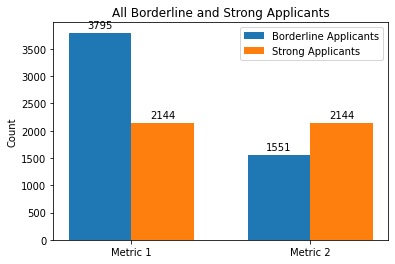

ValueError: Format 'gif' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff, webp)

<Figure size 432x288 with 0 Axes>

In [160]:
import matplotlib.pyplot as plt



labels = ['Metric 1', 'Metric 2']
strong_applicants = [m1_strong_count, m2_strong_count]
borderline_applicants = [m1_border_count, m2_border_count]

x = np.arange(len(labels)) 
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, borderline_applicants, width, label='Borderline Applicants')
rects2 = ax.bar(x + width/2, strong_applicants, width, label='Strong Applicants')

ax.set_ylabel('Count')
ax.set_title('All Borderline and Strong Applicants')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

plt.show()
